# Notebook Desafio Técnico A3 Data
## Exploração do datasets dos acidentes aereos
## Israel Jesus Santos Filho

In [247]:
import os
from collections import Counter

import numpy as np
import pandas as pd
import sweetviz as sv
import IPython

import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

In [158]:
path = os.getcwd()
path = path + "\\dados_csv"
file_names = os.listdir(path)

In [87]:
def clean_df(dataset: pd.DataFrame) -> pd.DataFrame:
    
    pattern = [i*'*' for i in range(1,10)]
    column_names = dataset.columns
    for idx, row in dataset.iterrows():
        for k in range(len(row)):
            ## tentando fazer a comparacao do tipo na coluna com o padrão str
            try: 
                if row[k] in pattern:
                    dataset[column_names[k]].iloc[idx] = np.nan
            except:
                continue
    return dataset
                

# Datasets:
* OCORRÊNCIA.csv - Informações sobre as ocorrências.
* OCORRÊNCIA_TIPO.csv - Informações sobre o tipo de ocorrência.
* AERONAVE.csv - Informações sobre as aeronaves envolvidas nas ocorrências.
* FATOR_CONTRIBUINTE.csv - Informações sobre os fatores contribuinte das ocorrências que tiveram investigações finalizadas.
* RECOMENDAÇÃO.csv - Informações sobre as recomendações de segurança geradas nas ocorrências.

# Modelo Relacional entre os Datasets

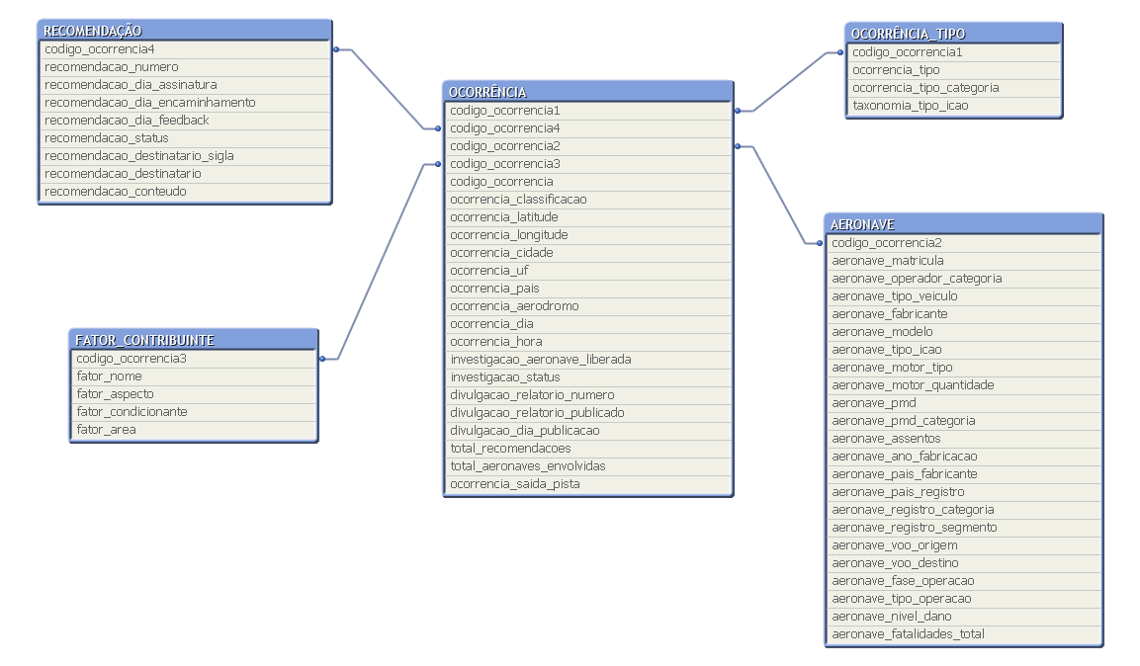

In [159]:
file_names

['aeronave.csv',
 'fator_contribuinte.csv',
 'ocorrencia.csv',
 'ocorrencia_tipo.csv',
 'recomendacao.csv']

In [191]:
aeronave_df = pd.read_csv(path + "\\" + file_names[0], sep = ";")
fator_contribuinte_df = pd.read_csv(path + "\\" + file_names[1], sep = ";")
ocorrencia_df = pd.read_csv(path + "\\" + file_names[2], sep = ";")
ocorrencia_tipo_df = pd.read_csv(path + "\\" + file_names[3], sep = ";")
recomendacao_df = pd.read_csv(path + "\\" + file_names[4], sep = ";")

In [132]:
print("Dimensoes dos DataFrames: ")
print("Aeronave-DF: ", aeronave_df.shape)
print("Fator-Contribuinte-DF: ", fator_contribuinte_df.shape)
print("Ocorrencia-DF: ", ocorrencia_df.shape)
print("Ocorrencia-Tipo-DF: ", ocorrencia_tipo_df.shape)
print("Recomendacao-DF: ", recomendacao_df.shape)



Dimensoes dos DataFrames: 
Aeronave-DF:  (5235, 23)
Fator-Contribuinte-DF:  (3464, 5)
Ocorrencia-DF:  (5167, 22)
Ocorrencia-Tipo-DF:  (5347, 4)
Recomendacao-DF:  (1197, 9)


In [192]:
# Merging DataFrames

df_aux_1 = pd.merge(ocorrencia_df, aeronave_df.drop_duplicates(), how = "inner", on=["codigo_ocorrencia2"])
print(df_aux_1.__len__())
df_aux_2 = pd.merge(df_aux_1.drop_duplicates(), ocorrencia_tipo_df.drop_duplicates(), how = "inner", on=["codigo_ocorrencia1"])
print(df_aux_2.__len__())
df_aux_3 = pd.merge(df_aux_2.drop_duplicates(), fator_contribuinte_df.drop_duplicates(), how = "inner", on=["codigo_ocorrencia3"])
print(df_aux_3.__len__())
df_final = pd.merge(df_aux_3.drop_duplicates(), recomendacao_df.drop_duplicates(), how = "inner", on=["codigo_ocorrencia4"])
print(df_final.__len__())

5235
5417
3735
6687


In [171]:
#df_final.fillna(0, inplace = True)
df_final.info()

df_final[['fator_nome', 'fator_aspecto', 'fator_condicionante', 'fator_area']].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6687 entries, 0 to 6686
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   codigo_ocorrencia                6687 non-null   int64  
 1   codigo_ocorrencia1               6687 non-null   int64  
 2   codigo_ocorrencia2               6687 non-null   int64  
 3   codigo_ocorrencia3               6687 non-null   int64  
 4   codigo_ocorrencia4               6687 non-null   int64  
 5   ocorrencia_classificacao         6687 non-null   object 
 6   ocorrencia_latitude              6687 non-null   object 
 7   ocorrencia_longitude             6687 non-null   object 
 8   ocorrencia_cidade                6687 non-null   object 
 9   ocorrencia_uf                    6687 non-null   object 
 10  ocorrencia_pais                  6687 non-null   object 
 11  ocorrencia_aerodromo             6687 non-null   object 
 12  ocorrencia_dia      

,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
2,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
3,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
4,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO


In [175]:
df_final

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,fator_condicionante,fator_area,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario
0,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,...,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,A-582/CENIPA/2014 - 01,2016-07-29,2016-08-25,2016-12-20,Atuar junto às empresas que operam segundo o R...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,...,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,A-582/CENIPA/2014 - 02,2016-07-29,2016-08-25,2016-12-20,Atuar junto à Administração do Aeroporto Inter...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
2,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,...,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,A-582/CENIPA/2014 - 03,2016-07-29,2016-08-25,NaN,Orientar as suas organizações subordinadas em ...,AGUARDANDO RESPOSTA,DECEA,DEPARTAMENTO DE CONTROLE DE ESPAÇO AÉREO
3,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,...,INDIVIDUAL,FATOR HUMANO,A-582/CENIPA/2014 - 01,2016-07-29,2016-08-25,2016-12-20,Atuar junto às empresas que operam segundo o R...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
4,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,...,INDIVIDUAL,FATOR HUMANO,A-582/CENIPA/2014 - 02,2016-07-29,2016-08-25,2016-12-20,Atuar junto à Administração do Aeroporto Inter...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6682,79713,79713,79713,79713,79713,ACIDENTE,\t-33.176944\t,\t-53.014167\t,SANTA VITÓRIA DO PALMAR,RS,...,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,A-146/CENIPA/2020 - 01,2021-07-08,2021-07-26,NaN,Atuar junto à empresa Plá e Silva Aviação Agrí...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
6683,79713,79713,79713,79713,79713,ACIDENTE,\t-33.176944\t,\t-53.014167\t,SANTA VITÓRIA DO PALMAR,RS,...,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,A-146/CENIPA/2020 - 02,2021-07-08,2021-07-26,NaN,Atuar junto à empresa Plá e Silva Aviação Agrí...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
6684,79713,79713,79713,79713,79713,ACIDENTE,\t-33.176944\t,\t-53.014167\t,SANTA VITÓRIA DO PALMAR,RS,...,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,A-146/CENIPA/2020 - 03,2021-07-08,2021-07-26,NaN,Divulgar os ensinamentos colhidos na presente ...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
6685,80073,80073,80073,80073,80073,ACIDENTE,-10.98472,-37.05166,ARACAJU,SE,...,MANUTENÇÃO DA AERONAVE,FATOR OPERACIONAL,A-063/CENIPA/2021 - 01,2021-11-12,2021-11-19,NaN,Divulgar os ensinamentos colhidos nesta invest...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL


# Explorando os Datasets

1. Aeronave_DF

In [50]:
print("Colunas Tipos:")
aeronave_df.dtypes

Colunas Tipos:


codigo_ocorrencia2               int64
aeronave_matricula              object
aeronave_operador_categoria     object
aeronave_tipo_veiculo           object
aeronave_fabricante             object
aeronave_modelo                 object
aeronave_tipo_icao              object
aeronave_motor_tipo             object
aeronave_motor_quantidade       object
aeronave_pmd                     int64
aeronave_pmd_categoria           int64
aeronave_assentos              float64
aeronave_ano_fabricacao        float64
aeronave_pais_fabricante        object
aeronave_pais_registro          object
aeronave_registro_categoria     object
aeronave_registro_segmento      object
aeronave_voo_origem             object
aeronave_voo_destino            object
aeronave_fase_operacao          object
aeronave_tipo_operacao          object
aeronave_nivel_dano             object
aeronave_fatalidades_total       int64
dtype: object

In [55]:
print("Nans ou Valores Faltantes")
print(aeronave_df.isna().sum())

Nans ou Valores Faltantes
codigo_ocorrencia2               0
aeronave_matricula               0
aeronave_operador_categoria      0
aeronave_tipo_veiculo            0
aeronave_fabricante              0
aeronave_modelo                  0
aeronave_tipo_icao               0
aeronave_motor_tipo              5
aeronave_motor_quantidade        0
aeronave_pmd                     0
aeronave_pmd_categoria           0
aeronave_assentos              194
aeronave_ano_fabricacao        200
aeronave_pais_fabricante         0
aeronave_pais_registro           0
aeronave_registro_categoria      0
aeronave_registro_segmento       0
aeronave_voo_origem              1
aeronave_voo_destino             1
aeronave_fase_operacao           0
aeronave_tipo_operacao           0
aeronave_nivel_dano              0
aeronave_fatalidades_total       0
dtype: int64


In [88]:
aeronave_df = clean_df(aeronave_df)

In [183]:
aeronave_df[['aeronave_nivel_dano','aeronave_fatalidades_total']]

,aeronave_nivel_dano,aeronave_fatalidades_total
0,NENHUM,0
1,SUBSTANCIAL,0
2,SUBSTANCIAL,0
3,LEVE,0
4,SUBSTANCIAL,0
...,...,...
5230,NENHUM,0
5231,NENHUM,0
5232,LEVE,0
5233,NENHUM,0


In [184]:
teste_1 = aeronave_df[['aeronave_nivel_dano','aeronave_fatalidades_total']]

teste_1[aeronave_df[['aeronave_nivel_dano','aeronave_fatalidades_total']].aeronave_fatalidades_total != 0]

,aeronave_nivel_dano,aeronave_fatalidades_total
15,SUBSTANCIAL,1
16,DESTRUÍDA,3
18,DESTRUÍDA,2
19,DESTRUÍDA,1
27,DESTRUÍDA,4
...,...,...
5157,SUBSTANCIAL,2
5171,SUBSTANCIAL,1
5178,DESTRUÍDA,1
5187,SUBSTANCIAL,2


In [89]:
#Tratando o erro devido a diferença de tipos dentro desta coluna
aeronave_df['aeronave_operador_categoria'] = pd.to_numeric(aeronave_df['aeronave_operador_categoria'], 
                                                           errors='coerce')

aeronave_df_report = sv.analyze(aeronave_df)

aeronave_df_report.show_html("aeronave_df.html", open_browser = False)


Report aeronave_df.html was generated.


In [90]:
IPython.display.IFrame("aeronave_df.html", width = 1280, height = 720)

2. Ocorrência

In [94]:
print("Colunas Tipos:")
ocorrencia_df.dtypes

Colunas Tipos:


codigo_ocorrencia                  int64
codigo_ocorrencia1                 int64
codigo_ocorrencia2                 int64
codigo_ocorrencia3                 int64
codigo_ocorrencia4                 int64
ocorrencia_classificacao          object
ocorrencia_latitude               object
ocorrencia_longitude              object
ocorrencia_cidade                 object
ocorrencia_uf                     object
ocorrencia_pais                   object
ocorrencia_aerodromo              object
ocorrencia_dia                    object
ocorrencia_hora                   object
investigacao_aeronave_liberada    object
investigacao_status               object
divulgacao_relatorio_numero       object
divulgacao_relatorio_publicado    object
divulgacao_dia_publicacao         object
total_recomendacoes                int64
total_aeronaves_envolvidas         int64
ocorrencia_saida_pista            object
dtype: object

In [95]:
print("Nans ou Valores Faltantes")
print(ocorrencia_df.isna().sum())

Nans ou Valores Faltantes
codigo_ocorrencia                    0
codigo_ocorrencia1                   0
codigo_ocorrencia2                   0
codigo_ocorrencia3                   0
codigo_ocorrencia4                   0
ocorrencia_classificacao             0
ocorrencia_latitude               1495
ocorrencia_longitude              1496
ocorrencia_cidade                    0
ocorrencia_uf                        2
ocorrencia_pais                      0
ocorrencia_aerodromo              1885
ocorrencia_dia                       0
ocorrencia_hora                      1
investigacao_aeronave_liberada    1778
investigacao_status                257
divulgacao_relatorio_numero       3299
divulgacao_relatorio_publicado       0
divulgacao_dia_publicacao         3816
total_recomendacoes                  0
total_aeronaves_envolvidas           0
ocorrencia_saida_pista               0
dtype: int64


In [92]:
ocorrencia_df = clean_df(ocorrencia_df)


ocorrencia_df_report = sv.analyze(ocorrencia_df)

ocorrencia_df_report.show_html("ocorrencia_df.html", open_browser = False)



Report ocorrencia_df.html was generated.


In [93]:
IPython.display.IFrame("ocorrencia_df.html", width = 1280, height = 720)

In [111]:
ocorrencia_df['ano'] = ocorrencia_df.ocorrencia_dia.apply(lambda x: x[len(x)-4:len(x)])

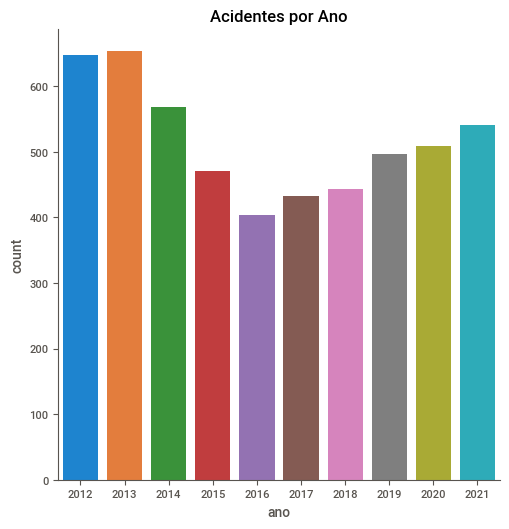

In [117]:
sn.catplot(x = "ano", kind="count", data = ocorrencia_df)
plt.title('Acidentes por Ano')
plt.show()

# Analisando o  DATASET depois dos Joins

In [193]:
df_final = clean_df(df_final)


df_final_report = sv.analyze(df_final)

df_final_report.show_html("df_final_report.html", open_browser = False)


Report df_final_report.html was generated.


In [194]:
IPython.display.IFrame("df_final_report.html", width = 1280, height = 720)

## Perguntas
* Qual a quantidade de Ocorrências de acidentes ao longo dos anos coletados?
* Classificação das Ocorrências?
* Quais os Estados que concentram mais acidentes?
* Quais os principais tipos de ocorrencias que resultam nos acidentes?
* Quais os os principais Fatores apontados pelos especialistas que resultaram nas ocorrências?
* Esses fatores possuem condicionantes? Se sim, quais?
* Fatores areas?
* Qual a quantidade de casos que tiverem algum tipo de recomendação? Se sim, qual a porcentagem?
* Elas foram seguidas pelas companhias provedoras? Se sim, qual a porcentagem?
* De acordo com a matricula, qual a taxa de aeronaves brasileiras envolvidas? (PR, PP, PT, PS, PU)
* Bônus: Tentar pensar em caracteristicas da Aeronaves que possam ser usadas para tentar calcular probabilidades para os tipos de ocorrências presentes

In [325]:
ocorr_class, N = np.unique(ocorrencia_df.ocorrencia_classificacao.values, return_counts=True)
total = N.sum()
percent = N / total
data = {'ocor_class': ocorr_class,
        '#ocor_class': N,
        '#percent': percent}
ocorr_class_df = pd.DataFrame(data)
ocorr_class_df

,ocor_class,#ocor_class,#percent
0,ACIDENTE,1667,0.322624
1,INCIDENTE,2809,0.543642
2,INCIDENTE GRAVE,691,0.133733


Text(0.5, 1.0, 'Classificação das Ocorrências')

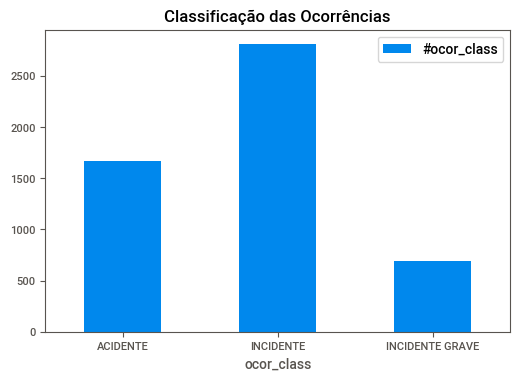

In [326]:
ocorr_class_df.plot.bar(x='ocor_class', y='#ocor_class', rot=0)
plt.title("Classificação das Ocorrências")

Text(0.5, 1.0, 'Percent Classificação das Ocorrências')

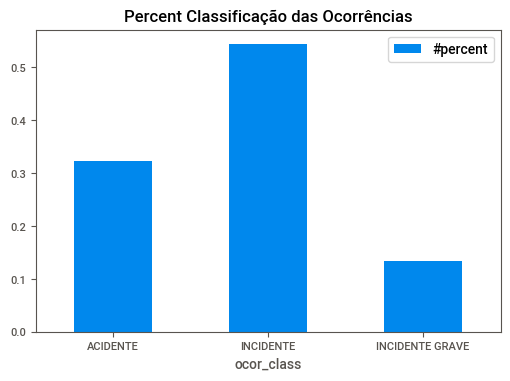

In [327]:
ocorr_class_df.plot.bar(x='ocor_class', y='#percent', rot=0)
plt.title("Percent Classificação das Ocorrências")

In [209]:
estados, N = np.unique(ocorrencia_df.ocorrencia_uf.values, return_counts=True)
total = N.sum()
percent = N / total
data = {'estados': estados[1:],
        '#acidentes': N[1:],
        '#percent': percent[1:]}
estados_df = pd.DataFrame(data)
estados_df


,estados,#acidentes,#percent
0,AC,49,0.009483
1,AL,28,0.005419
2,AM,207,0.040062
3,AP,12,0.002322
4,BA,183,0.035417
5,CE,78,0.015096
6,DF,106,0.020515
7,ES,73,0.014128
8,GO,268,0.051868
9,MA,59,0.011419


Text(0.5, 1.0, '#Acidentes por Estado')

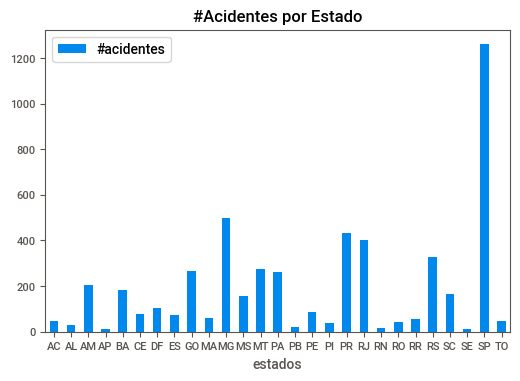

In [323]:
estados_df.plot.bar(x='estados', y='#acidentes', rot=0)
plt.title("#Acidentes por Estado")

Text(0.5, 1.0, '#Porcent_Acidentes por Estado')

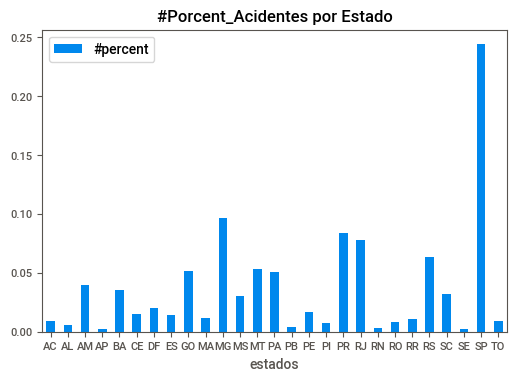

In [212]:
estados_df.plot.bar(x='estados', y='#percent', rot=0)
plt.title("#Porcent_Acidentes por Estado")

In [229]:

ocorrencias, N = np.unique(df_final.ocorrencia_tipo.values, return_counts=True)
total = N.sum()
percent = N / total
data = {'ocorrencias': ocorrencias,
        '#tipo_ocorrencia': N,
        '#percent_ocorrencia': percent}
ocorrencias_tipos_df = pd.DataFrame(data)

ocorrencias_tipos_df[ocorrencias_tipos_df['#tipo_ocorrencia'] > 100]

,ocorrencias,#tipo_ocorrencia,#percent_ocorrencia
5,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,521,0.077912
6,COLISÃO COM OBSTÁCULOS NO SOLO,277,0.041424
24,EXCURSÃO DE PISTA,420,0.062808
25,FALHA DO MOTOR EM VOO,620,0.092717
28,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,225,0.033647
36,INCURSÃO EM PISTA,252,0.037685
39,OPERAÇÃO A BAIXA ALTITUDE,232,0.034694
41,OUTROS,305,0.045611
42,PANE SECA,331,0.049499
45,PERDA DE CONTROLE EM VOO,1103,0.164947


Text(0.5, 1.0, 'Tipos de Ocorrencias')

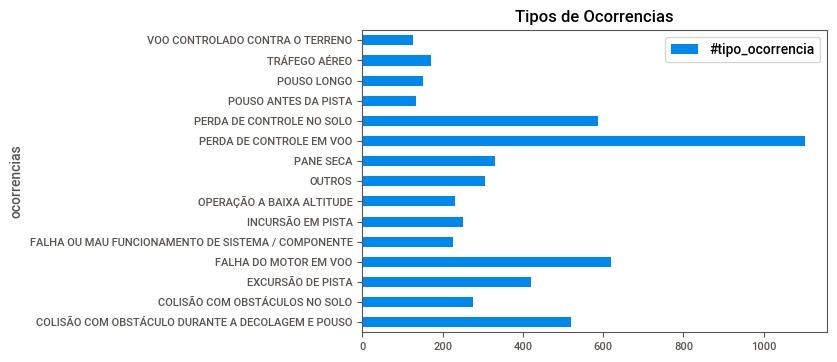

In [230]:
ocorrencias_tipos_df[ocorrencias_tipos_df['#tipo_ocorrencia'] > 100].plot.barh(x = 'ocorrencias', y='#tipo_ocorrencia')
plt.title("Tipos de Ocorrencias")

Text(0.5, 1.0, 'Percent Tipos de Ocorrencias')

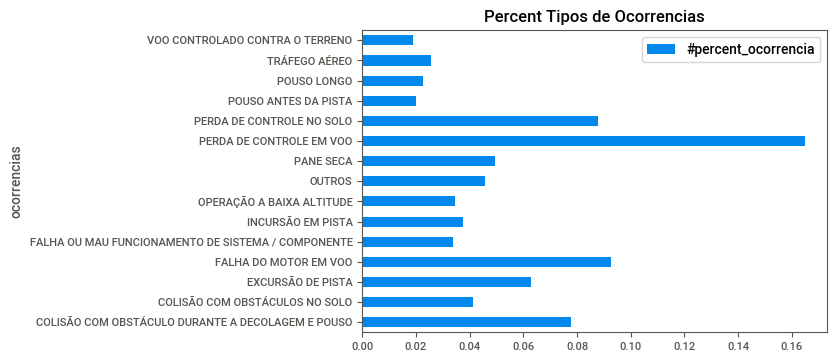

In [231]:
ocorrencias_tipos_df[ocorrencias_tipos_df['#tipo_ocorrencia'] > 100].plot.barh(x = 'ocorrencias', y='#percent_ocorrencia')
plt.title("Percent Tipos de Ocorrencias")

In [270]:

count_dict = Counter(df_final.fator_aspecto.values)
fator_aspecto = np.array(list(count_dict.keys()))
N = np.array(list(count_dict.values()))
total = N.sum()
percent = N / total
data = {'fator_aspecto': fator_aspecto,
        '#fator': N,
        '#percent_fator_aspecto': percent}
fator_aspecto_df = pd.DataFrame(data)
fator_aspecto_df.drop(index = 2, inplace = True)
fator_aspecto_df

,fator_aspecto,#fator,#percent_fator_aspecto
0,DESEMPENHO DO SER HUMANO,3314,0.495588
1,ASPECTO PSICOLÓGICO,2639,0.394646
3,ASPECTO DE PROJETO,27,0.004038
4,ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL,154,0.023030
5,INFRAESTRUTURA AEROPORTUÁRIA,177,0.026469
6,ERGONOMIA,34,0.005084
7,ASPECTO MÉDICO,153,0.022880
8,OUTRO,88,0.013160
9,ASPECTO DE FABRICAÇÃO,31,0.004636
10,INFRAESTRUTURA DE TRÁFEGO AÉREO,34,0.005084


Text(0.5, 1.0, 'Fatores')

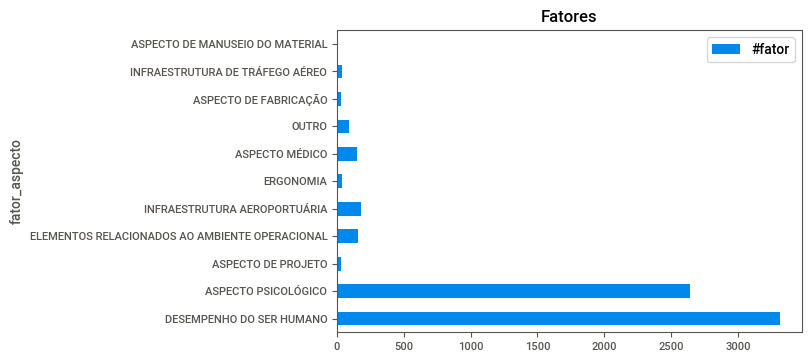

In [272]:
fator_aspecto_df.plot.barh(x = 'fator_aspecto', y='#fator')
plt.title("Fatores")


Text(0.5, 1.0, 'Percent Fator Aspecto')

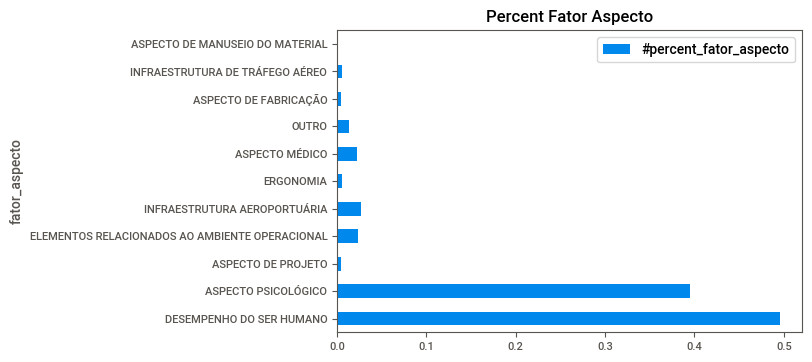

In [273]:

fator_aspecto_df.plot.barh(x = 'fator_aspecto', y='#percent_fator_aspecto')
plt.title("Percent Fator Aspecto")

In [276]:

count_dict = Counter(df_final.fator_condicionante.values)
fator_condicionante = np.array(list(count_dict.keys()))
N = np.array(list(count_dict.values()))
total = N.sum()
percent = N / total
data = {'fator_condicionante': fator_condicionante,
        '#fator_condicionante': N,
        '#percent_fator_condicionante': percent}
fator_aspecto_df = pd.DataFrame(data)
fator_aspecto_df.drop(index = 6, inplace = True)
fator_aspecto_df

,fator_condicionante,#fator_condicionante,#percent_fator_condicionante
0,OPERAÇÃO DA AERONAVE,2782,0.416031
1,INDIVIDUAL,1405,0.210109
2,ORGANIZACIONAL,886,0.132496
3,PSICOSSOCIAL,348,0.052041
4,PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO,205,0.030656
5,MANUTENÇÃO DA AERONAVE,327,0.048901


Text(0.5, 1.0, 'Fatores Condicionantes')

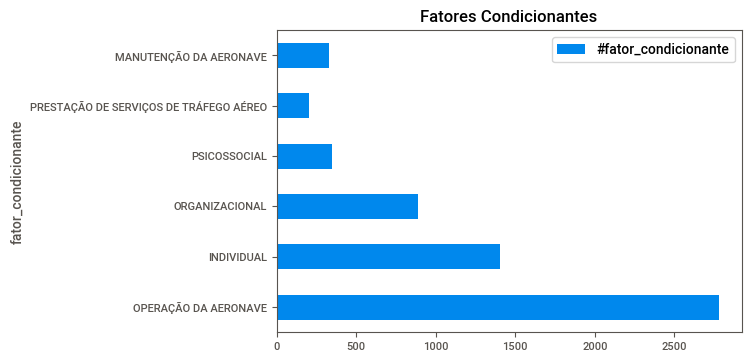

In [278]:
fator_aspecto_df.plot.barh(x = 'fator_condicionante', y='#fator_condicionante')
plt.title("Fatores Condicionantes")

Text(0.5, 1.0, 'Percent Fator Condicionante')

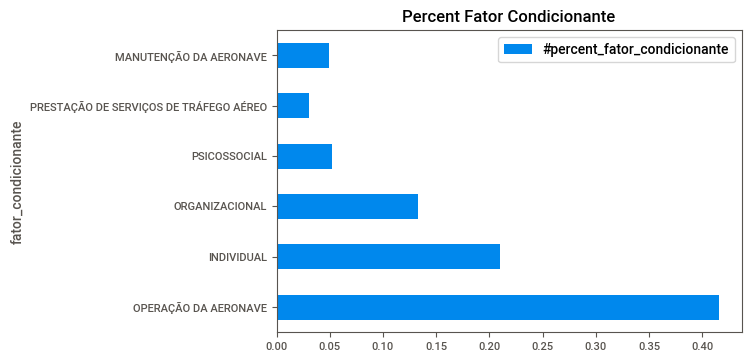

In [280]:
fator_aspecto_df.plot.barh(x = 'fator_condicionante', y='#percent_fator_condicionante')
plt.title("Percent Fator Condicionante")

In [284]:

count_dict = Counter(df_final.fator_area.values)
fator_area = np.array(list(count_dict.keys()))
N = np.array(list(count_dict.values()))
total = N.sum()
percent = N / total
data = {'fator_area': fator_area,
        '#fator_area': N,
        '#percent_fator_area': percent}
fator_area_df = pd.DataFrame(data)
fator_area_df.drop(index = 2, inplace = True)
fator_area_df



,fator_area,#fator_area,#percent_fator_area
0,FATOR OPERACIONAL,3679,0.550172
1,FATOR HUMANO,2826,0.422611
3,FATOR MATERIAL,65,0.009720
4,OUTRO,88,0.013160


Text(0.5, 1.0, 'Fatores Area')

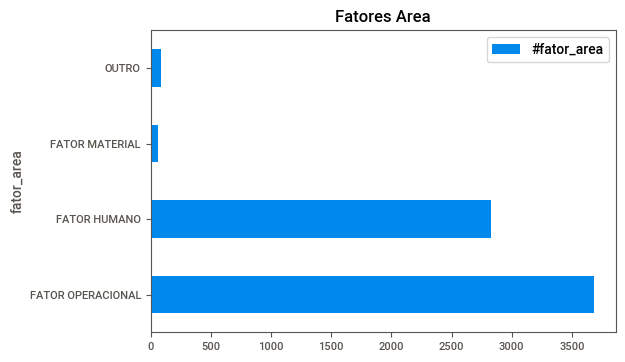

In [285]:
fator_area_df.plot.barh(x = 'fator_area', y = '#fator_area')
plt.title("Fatores Area")

Text(0.5, 1.0, 'Percent Fator Area')

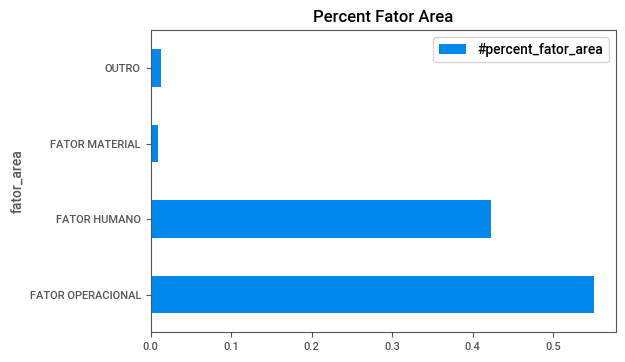

In [286]:
fator_area_df.plot.barh(x = 'fator_area', y='#percent_fator_area')
plt.title("Percent Fator Area")

In [289]:

count_dict = Counter(df_final.recomendacao_status.values)
recomendacao_status = np.array(list(count_dict.keys()))
N = np.array(list(count_dict.values()))
total = N.sum()
percent = N / total
data = {'recomendacao_status': recomendacao_status,
        '#fator': N,
        '#percent_recomendacao_status': percent}
recomendacao_status_df = pd.DataFrame(data)
recomendacao_status_df.drop(index = 4, inplace = True)
recomendacao_status_df

,recomendacao_status,#fator,#percent_recomendacao_status
0,CUMPRIDA,4441,0.664124
1,AGUARDANDO RESPOSTA,1371,0.205025
2,CUMPRIDA DE FORMA ALTERNATIVA,463,0.069239
3,NÃO CUMPRIDA,384,0.057425


Text(0.5, 1.0, 'Recomendacao Status')

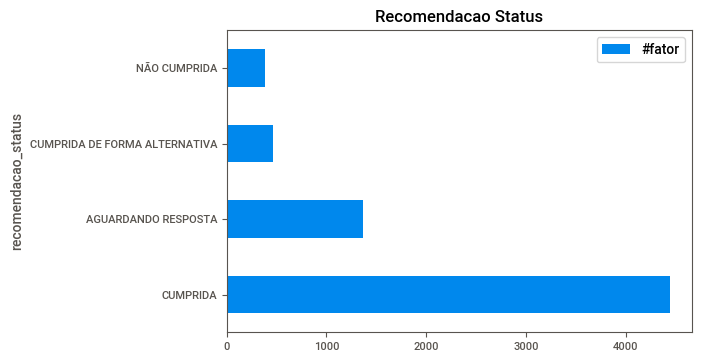

In [290]:
recomendacao_status_df.plot.barh(x = 'recomendacao_status', y = '#fator')
plt.title("Recomendacao Status")

Text(0.5, 1.0, 'Percent Recomendacao Status')

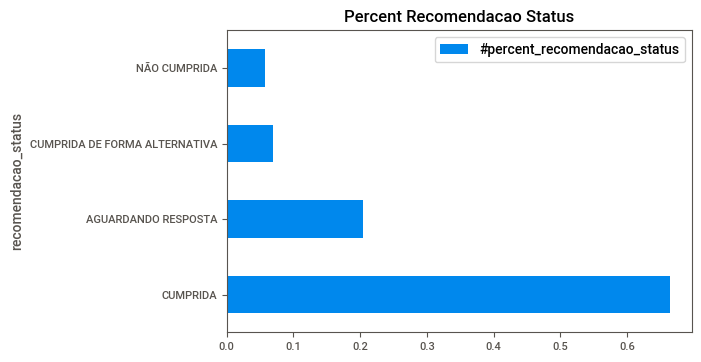

In [291]:
recomendacao_status_df.plot.barh(x = 'recomendacao_status', y = '#percent_recomendacao_status')
plt.title("Percent Recomendacao Status")

In [ ]:
dados = [ocorr_recomencadao_cump_df[['fator_aspecto']].values[k][0] for k in range(ocorr_recomencadao_cump_df[['fator_aspecto']].values.__len__())]

In [311]:

count_dict = Counter(dados)
fator_cumpriu_rec = np.array(list(count_dict.keys()))
N = np.array(list(count_dict.values()))
total = N.sum()
percent = N / total
data = {'fator_aspecto_cumpriu_rec': fator_cumpriu_rec,
        '#fator_aspecto_cumpriu': N,
        '#percent_fator_aspecto': percent}
fator_aspecto_cumpriu_df = pd.DataFrame(data)
fator_aspecto_cumpriu_df.drop(index = 2, inplace = True)
fator_aspecto_cumpriu_df

,fator_aspecto_cumpriu_rec,#fator_aspecto_cumpriu,#percent_fator_aspecto
0,DESEMPENHO DO SER HUMANO,2211,0.497861
1,ASPECTO PSICOLÓGICO,1757,0.395632
3,ASPECTO DE PROJETO,15,0.003378
4,ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL,92,0.020716
5,INFRAESTRUTURA AEROPORTUÁRIA,106,0.023868
6,ERGONOMIA,29,0.006530
7,OUTRO,68,0.015312
8,ASPECTO DE FABRICAÇÃO,20,0.004503
9,ASPECTO MÉDICO,109,0.024544
10,INFRAESTRUTURA DE TRÁFEGO AÉREO,17,0.003828


Text(0.5, 1.0, 'Fatores das Ocorrencias que Cumpriram as Recomendações')

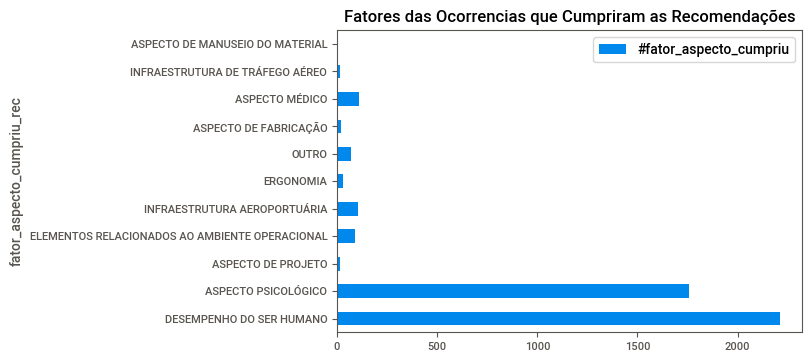

In [312]:
fator_aspecto_cumpriu_df.plot.barh(x = 'fator_aspecto_cumpriu_rec', y = '#fator_aspecto_cumpriu')
plt.title("Fatores das Ocorrencias que Cumpriram as Recomendações")

Text(0.5, 1.0, 'Percent Fatores das Ocorrencias que Cumpriram as Recomendações')

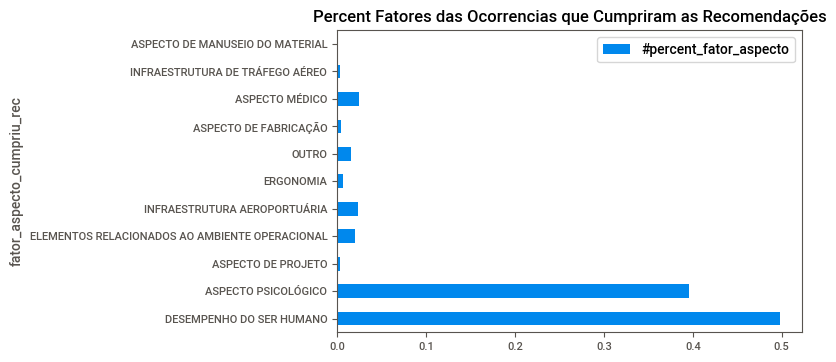

In [313]:
fator_aspecto_cumpriu_df.plot.barh(x = 'fator_aspecto_cumpriu_rec', y = '#percent_fator_aspecto')
plt.title("Percent Fatores das Ocorrencias que Cumpriram as Recomendações")

In [320]:
count_dict = Counter(df_final.aeronave_matricula.values)
aeronave_matricula = np.array(list(count_dict.keys()))
dados_total = [df_final.aeronave_matricula.iloc[k] for k in range(df_final.aeronave_matricula.values.__len__())]
dados_unicos = [aeronave_matricula[k] for k in range(aeronave_matricula.__len__())]
N_brasil = sum([1 for k in range(len(dados_total)) if dados_total[k][:2] in ["PR", "PP", "PT", "PS", "PU"]])


In [322]:
print("Percentage of ", round(N_brasil/dados_total.__len__(), 3))

0.9442201286077464